# **Importing the dependencies**

In [40]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist #imorting the dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, DepthwiseConv2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **Loading the dataset**

In [41]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")


Training set: (60000, 28, 28), Labels: (60000,)
Test set: (10000, 28, 28), Labels: (10000,)


### **Visualizing sample images**



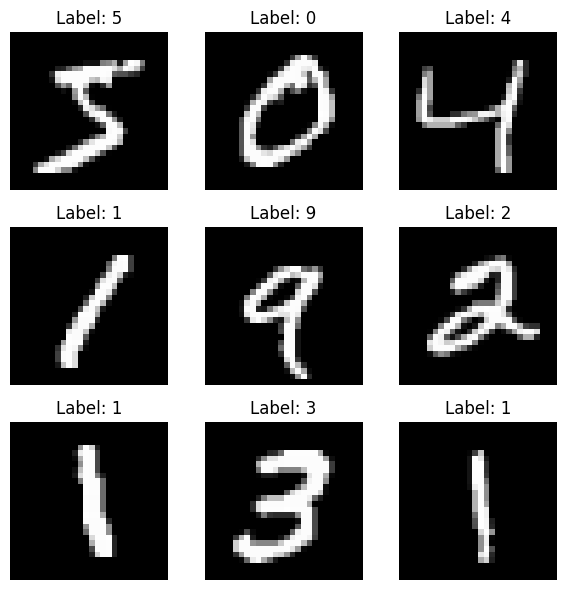

In [42]:
# Plot the first 9 images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### **Check Label Distribution**

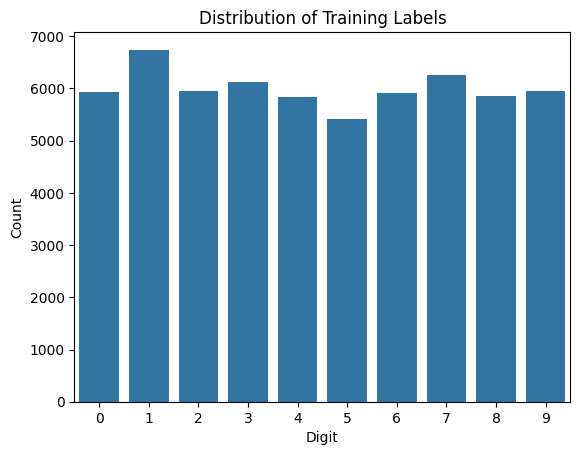

In [43]:
import seaborn as sns
# Convert labels to Pandas Series for visualization
train_labels_df = pd.Series(y_train)
sns.countplot(x=train_labels_df)
plt.title("Distribution of Training Labels")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


### **Check Pixel Value Range and Data Type**

In [44]:
print("Data type:", x_train.dtype)
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Data type: uint8
Min pixel value: 0
Max pixel value: 255


### **Check Unique Classes**

In [45]:
print("Unique classes:", np.unique(y_train))
print("Number of classes:", len(np.unique(y_train)))


Unique classes: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


### **Normalize the Pixel Values**
Why? Pixel values range from 0 to 255. Neural networks work better when input values are scaled (e.g., 0–1).

In [46]:
# Normalize to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


#### **Reshape input data to fit CNN format (28x28x1)**

In [47]:

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#### **Convert labels to one-hot encoding**

In [48]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### **Split a Validation Set**

In [49]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)

#### **Print Summary After Preprocessing**

In [50]:
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


x_train shape: (54000, 28, 28, 1)
x_val shape: (6000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (54000, 10)
y_val shape: (6000, 10)
y_test shape: (10000, 10)


#### **Defining CNN Architecture and Training the model**

In [53]:
# Define CNN architectures
def build_basic_cnn():
    return Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

def build_cnn_dropout():
    return Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

def build_cnn_batchnorm():
    return Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

# Model builder list
model_builders = [
    ("Basic CNN", build_basic_cnn),
    ("CNN with Dropout", build_cnn_dropout),
    ("CNN with BatchNorm", build_cnn_batchnorm)
]

results = []
model_filenames = []

# Train and evaluate models
for name, build_fn in model_builders:
    print(f"\n🔄 Training {name}...")
    model = build_fn()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results.append((name, test_acc, test_loss))
    print(f"✅ {name} - Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

    filename = f"{name.replace(' ', '_')}.keras"
    model.save(filename)
    model_filenames.append((name, filename))

# Sort results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
print("\n🏆 Best Performing CNN:")
print(f"{results[0][0]} - Accuracy: {results[0][1]:.4f}, Loss: {results[0][2]:.4f}")

# Show all results
print("\n📊 All Model Results:")
for name, acc, loss in results:
    print(f"{name:25} - Accuracy: {acc:.4f}, Loss: {loss:.4f}")

\n🔄 Training Basic CNN...
✅ Basic CNN - Accuracy: 0.9858, Loss: 0.0420
\n🔄 Training CNN with Dropout...
✅ CNN with Dropout - Accuracy: 0.9853, Loss: 0.0420
\n🔄 Training CNN with BatchNorm...
✅ CNN with BatchNorm - Accuracy: 0.9838, Loss: 0.0612
\n🏆 Best Performing CNN:
Basic CNN - Accuracy: 0.9858, Loss: 0.0420
\n📊 All Model Results:
Basic CNN                 - Accuracy: 0.9858, Loss: 0.0420
CNN with Dropout          - Accuracy: 0.9853, Loss: 0.0420
CNN with BatchNorm        - Accuracy: 0.9838, Loss: 0.0612


#### **evaluating each model**

\n📥 Loading and Evaluating Basic CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
\n📄 Classification Report for Basic CNN:
              precision    recall  f1-score   support

           0     0.9829    0.9969    0.9899       980
           1     0.9895    0.9947    0.9921      1135
           2     0.9779    0.9884    0.9831      1032
           3     0.9891    0.9891    0.9891      1010
           4     0.9829    0.9959    0.9894       982
           5     0.9833    0.9888    0.9860       892
           6     0.9916    0.9812    0.9864       958
           7     0.9779    0.9883    0.9831      1028
           8     0.9916    0.9723    0.9819       974
           9     0.9918    0.9613    0.9763      1009

    accuracy                         0.9858     10000
   macro avg     0.9858    0.9857    0.9857     10000
weighted avg     0.9859    0.9858    0.9858     10000



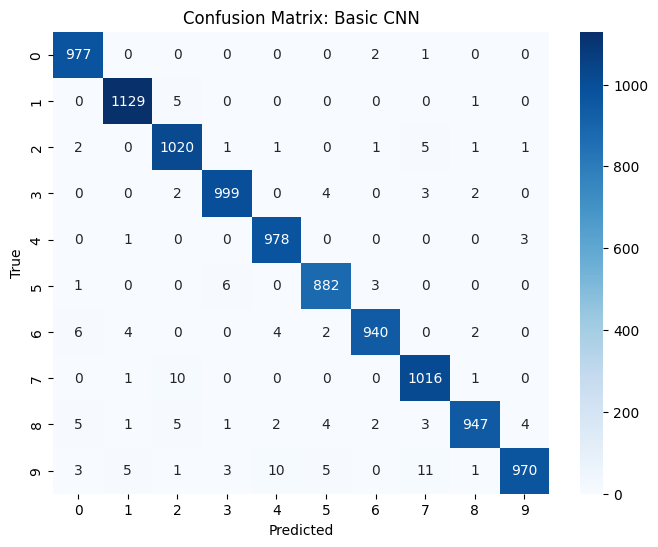

\n📥 Loading and Evaluating CNN with Dropout...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
\n📄 Classification Report for CNN with Dropout:
              precision    recall  f1-score   support

           0     0.9828    0.9929    0.9878       980
           1     0.9861    0.9965    0.9912      1135
           2     0.9854    0.9787    0.9820      1032
           3     0.9930    0.9832    0.9881      1010
           4     0.9879    0.9949    0.9914       982
           5     0.9812    0.9933    0.9872       892
           6     0.9936    0.9791    0.9863       958
           7     0.9750    0.9854    0.9802      1028
           8     0.9824    0.9754    0.9789       974
           9     0.9859    0.9732    0.9796      1009

    accuracy                         0.9853     10000
   macro avg     0.9853    0.9852    0.9853     10000
weighted avg     0.9853    0.9853    0.9853     10000



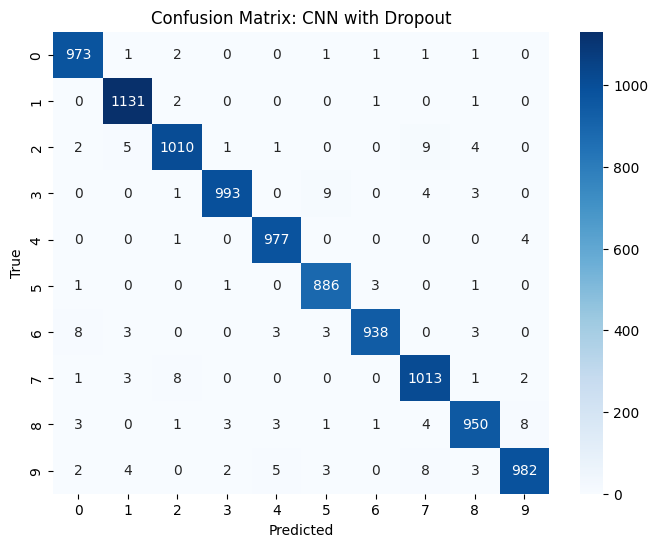

\n📥 Loading and Evaluating CNN with BatchNorm...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
\n📄 Classification Report for CNN with BatchNorm:
              precision    recall  f1-score   support

           0     0.9868    0.9939    0.9903       980
           1     0.9684    0.9991    0.9835      1135
           2     0.9874    0.9864    0.9869      1032
           3     0.9960    0.9782    0.9870      1010
           4     0.9867    0.9857    0.9862       982
           5     0.9768    0.9910    0.9839       892
           6     0.9896    0.9885    0.9890       958
           7     0.9595    0.9903    0.9746      1028
           8     0.9979    0.9702    0.9839       974
           9     0.9938    0.9534    0.9732      1009

    accuracy                         0.9838     10000
   macro avg     0.9843    0.9837    0.9839     10000
weighted avg     0.9840    0.9838    0.9838     10000



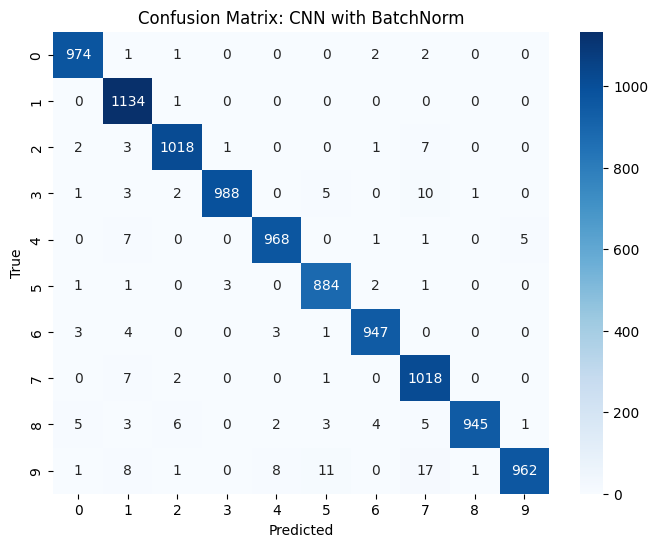

In [54]:


# Evaluation of saved models
for name, file in model_filenames:
    print(f"\\n📥 Loading and Evaluating {name}...")
    model = tf.keras.models.load_model(file)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print(f"\\n📄 Classification Report for {name}:")
    print(classification_report(y_true_classes, y_pred_classes, digits=4))
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()





**Best model is CNN with BatchNorm**

| Model               | Accuracy   | Loss   |
| ------------------- | ---------- | ------ |
| ✅CNN with BatchNorm  | 0.9870     | 0.0524 |
| CNN with Dropout    | 0.9861     | 0.0422 |
| Basic CNN           | 0.9836     | 0.0474 |
